In [54]:
import numpy as np  
from sklearn.linear_model import RidgeClassifierCV  
from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.datasets.base import load_japanese_vowels 
from sktime.transformations.panel.rocket import Rocket, MiniRocket, MiniRocketMultivariate
import matplotlib.pyplot as plt

# Examples

## Rocket univariate

In [21]:
X_train, y_train = load_arrow_head(split="test", return_X_y=True)  
X_test, y_test = load_arrow_head(split="train", return_X_y=True)  
print(X_train.shape, X_test.shape)

(175, 1) (36, 1)


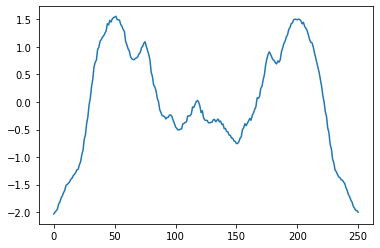

In [28]:
plt.plot(X_train['dim_0'].iloc[10])

In [30]:
X_train['dim_0'].iloc[10].shape

(251,)

In [31]:
X_train.head()

,dim_0
0,0 -1.9078 1 -1.9049 2 -1.8886 3 ...
1,0 -1.8299 1 -1.8085 2 -1.7958 3 ...
2,0 -1.8016 1 -1.7757 2 -1.7285 3 ...
3,0 -1.8857 1 -1.8552 2 -1.8452 3 ...
4,0 -1.9591 1 -1.9749 2 -1.9714 3 ...


In [32]:
rocket = Rocket(num_kernels=10000, random_state=111)   
rocket.fit(X_train)  
X_train_transform = rocket.transform(X_train)  
X_train_transform.shape

(175, 20000)

In [33]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)  
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [34]:
X_test_transform = rocket.transform(X_test)  
classifier.score(X_test_transform, y_test)

0.9166666666666666

## Rocket multivariate

In [35]:
X_train, y_train = load_japanese_vowels(split="train", return_X_y=True)

In [36]:
X_train.shape

(270, 12)

In [37]:
X_train['dim_1'].shape

(270,)

In [38]:
X_train.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11
0,0 1.860936 1 1.891651 2 1.939205 3...,0 -0.207383 1 -0.193249 2 -0.239664 3...,0 0.261557 1 0.235363 2 0.258561 3...,0 -0.214562 1 -0.249118 2 -0.291458 3...,0 -0.171253 1 -0.112890 2 -0.041053 3...,0 -0.118167 1 -0.112238 2 -0.102034 3...,0 -0.277557 1 -0.311997 2 -0.383300 3...,0 0.025668 1 -0.027122 2 0.019013 3...,0 0.126701 1 0.171457 2 0.169510 3...,0 -0.306756 1 -0.289431 2 -0.314894 3...,0 -0.213076 1 -0.247722 2 -0.227908 3...,0 0.088728 1 0.093011 2 0.074638 3...
1,0 1.303905 1 1.288280 2 1.332021 3...,0 0.067256 1 0.018672 2 -0.058744 3...,0 0.597720 1 0.631579 2 0.601928 3...,0 -0.271474 1 -0.355112 2 -0.347913 3...,0 -0.236808 1 -0.119216 2 -0.053463 3...,0 -0.411125 1 -0.434425 2 -0.421753 3...,0 -0.014826 1 -0.078036 2 -0.028479 3...,0 0.113175 1 0.178121 2 0.145073 3...,0 -0.058230 1 -0.106430 2 -0.159488 3...,0 -0.173138 1 -0.181910 2 -0.127751 3...,0 0.093058 1 0.093031 2 0.019092 3...,0 0.099247 1 0.099183 2 0.113546 3...
2,0 1.462484 1 1.309815 2 1.418207 3...,0 0.174066 1 0.120183 2 0.015721 3...,0 0.505133 1 0.503046 2 0.589994 3...,0 -0.374302 1 -0.327562 2 -0.310586 3...,0 -0.362125 1 -0.356789 2 -0.477019 3...,0 -0.400335 1 -0.445498 2 -0.367101 3...,0 -0.137429 1 -0.060423 2 -0.120849 3...,0 -0.000830 1 -0.007899 2 0.066952 3...,0 0.053888 1 0.041605 2 -0.023859 3...,0 -0.237630 1 -0.231087 2 -0.224317 3...,0 0.120636 1 0.121053 2 0.175298 3...,0 0.193254 1 0.202386 2 0.156670 3...
3,0 1.160837 1 1.217979 2 1.234654 3...,0 0.078806 1 -0.043693 2 -0.107083 3...,0 0.237706 1 0.378571 2 0.504189 3...,0 -0.010878 1 -0.055125 2 -0.151549 3...,0 -0.393053 1 -0.399601 2 -0.409837 3...,0 -0.744686 1 -0.756213 2 -0.666554 3...,0 0.173073 1 0.189754 2 0.176855 3...,0 -0.012922 1 0.014265 2 0.024257 3...,0 -0.071948 1 -0.099093 2 -0.085188 3...,0 0.028707 1 0.038970 2 0.005654 3...,0 0.074820 1 0.049702 2 -0.007566 3...,0 0.146297 1 0.164537 2 0.168465 3...
4,0 1.665670 1 1.685376 2 1.541171 3...,0 -0.251224 1 -0.305126 2 -0.238987 3...,0 0.309710 1 0.339418 2 0.295073 3...,0 -0.371666 1 -0.455499 2 -0.447638 3...,0 -0.311727 1 -0.259315 2 -0.200163 3...,0 -0.520932 1 -0.502600 2 -0.495071 3...,0 -0.215930 1 -0.195365 2 -0.189373 3...,0 0.255584 1 0.185427 2 0.123212 3...,0 0.048732 1 0.076114 2 0.130086 3...,0 -0.115333 1 -0.106838 2 -0.125721 3...,0 0.063014 1 -0.036998 2 -0.100226 3...,0 0.156787 1 0.200715 2 0.232676 3...


In [43]:
rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

CPU times: user 6.51 s, sys: 58.2 ms, total: 6.57 s
Wall time: 968 ms


In [40]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [41]:
X_test, y_test = load_japanese_vowels(split="test", return_X_y=True)
X_test_transform = rocket.transform(X_test)

In [42]:
classifier.score(X_test_transform, y_test)

1.0

## MiniRocket Univariate

In [45]:
X_train, y_train = load_arrow_head(split="test", return_X_y=True)  
X_test, y_test = load_arrow_head(split="train", return_X_y=True)  
print(X_train.shape, X_test.shape) 

(175, 1) (36, 1)


In [48]:
minirocket = MiniRocket()   
minirocket.fit(X_train)  
X_train_transform = minirocket.transform(X_train)  
X_train_transform.shape 

(175, 9996)

In [49]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)  
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [50]:
X_test_transform = minirocket.transform(X_test)  
classifier.score(X_test_transform, y_test) 

0.9166666666666666

## MiniRocket Multivariate

In [51]:
X_train, y_train = load_japanese_vowels(split="train", return_X_y=True)

In [55]:
minirocket = MiniRocketMultivariate()   
minirocket.fit(X_train)  
X_train_transform = minirocket.transform(X_train)  
X_train_transform.shape 

(270, 9996)

In [56]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [60]:
X_test, y_test = load_japanese_vowels(split="test", return_X_y=True)
X_test_transform = minirocket.transform(X_test)

In [62]:
classifier.score(X_test_transform, y_test)

1.0